In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import csv

import pandas as pd
from sklearn.cluster import KMeans
from math import sqrt
import  pylab as pl
import numpy as np

In [122]:
cw2=pd.read_csv("48_Industry_Portfolios_daily.CSV",sep=',',error_bad_lines=False,index_col=0,parse_dates = True,dtype='unicode')

In [123]:
mat_cw2 = cw2.values.T
#mat_cw2.astype(float)
Agric=pd.to_numeric(mat_cw2[0], errors='coerce')
Food=pd.to_numeric(mat_cw2[1], errors='coerce')
v=np.zeros(mat_cw2.shape)
for i in range(0,48):
    v[i]=pd.to_numeric(mat_cw2[i], errors='coerce')

v_t=v.T

new_df=pd.DataFrame(data=v_t[0:,0:],index=cw2.index,columns=cw2.columns)

In [283]:
new_df.

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
19260701,0.56,-0.07,NaN,-1.39,0.00,-1.44,0.62,-1.27,-0.90,0.12,...,-0.93,0.15,2.77,-0.02,0.27,0.59,0.47,0.81,0.69,-1.66
19260702,0.29,0.06,NaN,0.78,0.70,1.46,0.03,0.00,-0.34,-0.35,...,1.07,0.06,0.00,0.01,-0.10,1.04,-0.03,-0.61,-0.45,3.09
19260706,-0.33,0.18,NaN,-1.74,0.50,-0.96,-0.06,4.27,-1.20,0.41,...,0.73,-0.19,0.77,-0.22,-0.67,0.45,0.31,-0.72,0.04,1.41
19260707,3.57,-0.15,NaN,-1.73,-0.12,-0.49,-0.06,-4.10,-0.22,0.16,...,2.22,0.18,-3.21,-0.57,-0.70,-1.09,0.21,0.07,-0.40,0.62
19260708,0.30,1.12,NaN,-0.15,0.30,-0.49,0.24,0.00,-0.01,0.79,...,-0.39,0.46,-1.10,-0.38,0.33,0.99,-0.88,-0.36,-0.93,0.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20171025,0.60,0.02,-1.05,-0.64,-1.30,-1.59,-0.86,-0.06,0.03,0.34,...,-0.55,-0.89,-0.80,-0.04,-1.28,0.11,-0.25,0.14,-0.40,-1.09
20171026,0.36,-0.18,0.72,0.18,1.25,0.29,0.28,0.67,0.00,0.59,...,0.39,1.00,-0.07,0.51,1.05,0.54,1.00,0.46,0.22,0.27
20171027,0.69,0.43,-0.87,-0.58,-0.66,-1.56,0.62,-0.27,-0.36,0.44,...,-0.21,0.25,-0.33,-1.04,0.41,0.49,0.58,0.15,0.34,0.72
20171030,-1.99,-1.74,-1.43,-0.54,-1.58,-0.11,-1.06,-1.15,-0.95,-1.58,...,-1.42,-1.31,-0.86,-1.90,-0.54,-1.76,-0.74,-1.03,-1.25,-0.14


In [197]:
ten_yr_trd_days=252*10


In [198]:
subset_df=new_df[48200-ten_yr_trd_days:48200]
subset_df

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
20071030,-1.43,-0.53,-0.80,-0.59,-0.02,-0.36,-1.26,-1.58,-0.02,-0.34,...,0.30,-0.59,-1.10,-0.07,0.26,-0.47,-0.56,-1.41,-0.72,-0.02
20071031,1.30,0.54,1.07,0.23,0.19,0.42,0.56,1.27,1.02,0.81,...,1.15,1.31,0.81,0.54,0.98,0.35,0.80,0.72,1.66,0.83
20071101,-4.09,-2.64,-2.18,-2.84,-0.85,-2.70,-1.69,-3.29,-3.12,-3.41,...,-2.65,-2.28,-3.03,-3.25,-2.71,-3.24,-3.24,-3.33,-3.38,-1.01
20071102,-2.63,-0.61,0.58,0.19,-0.35,-0.19,-1.25,-0.82,0.03,-1.29,...,-0.04,0.24,-1.13,-0.43,-0.58,-0.68,-0.14,0.30,-0.25,0.44
20071105,-0.86,-1.20,-1.81,-0.38,0.41,-0.13,-1.39,-1.08,-2.16,-2.00,...,-1.03,-0.91,-1.11,-1.40,-1.14,-0.96,-0.37,-0.24,-0.80,-0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20171025,0.60,0.02,-1.05,-0.64,-1.30,-1.59,-0.86,-0.06,0.03,0.34,...,-0.55,-0.89,-0.80,-0.04,-1.28,0.11,-0.25,0.14,-0.40,-1.09
20171026,0.36,-0.18,0.72,0.18,1.25,0.29,0.28,0.67,0.00,0.59,...,0.39,1.00,-0.07,0.51,1.05,0.54,1.00,0.46,0.22,0.27
20171027,0.69,0.43,-0.87,-0.58,-0.66,-1.56,0.62,-0.27,-0.36,0.44,...,-0.21,0.25,-0.33,-1.04,0.41,0.49,0.58,0.15,0.34,0.72
20171030,-1.99,-1.74,-1.43,-0.54,-1.58,-0.11,-1.06,-1.15,-0.95,-1.58,...,-1.42,-1.31,-0.86,-1.90,-0.54,-1.76,-0.74,-1.03,-1.25,-0.14


In [199]:
len(subset_df.dropna())

2520

As the original dataset contains too many NaN values, I select the last 5000 datapoints and build a new dataframe called "subset_df" to see whether it contains any NaN values. Then, after applying the function "dropna()" , the length of the "subset_df" does not change,so we can conclude that there is no NaN value in the last 5000 datapoint. Therefore, I will focus on the last 5000 datapoint to do cluster analysis in the next step. 

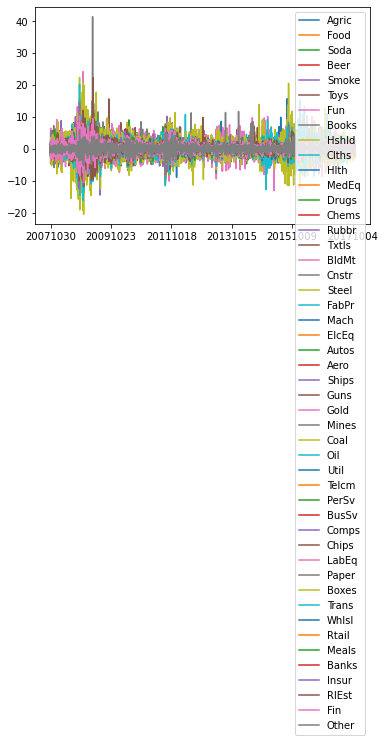

In [200]:
subset_df.plot()

In [291]:
#Transpose the dataframe, to swap the column and row
trans=np.asarray(subset_df).T
trans_df=pd.DataFrame(data=trans[0:,0:],index=subset_df.columns,columns=subset_df.index)
trans_df

,20071030,20071031,20071101,20071102,20071105,20071106,20071107,20071108,20071109,20071112,...,20171018,20171019,20171020,20171023,20171024,20171025,20171026,20171027,20171030,20171031
Agric,-1.43,1.30,-4.09,-2.63,-0.86,1.19,-3.93,1.40,0.48,-2.28,...,0.70,-1.24,0.75,-1.01,-0.61,0.60,0.36,0.69,-1.99,1.29
Food,-0.53,0.54,-2.64,-0.61,-1.20,-0.08,-1.81,0.70,-1.10,-0.04,...,-0.30,-0.38,0.04,-0.56,-0.04,0.02,-0.18,0.43,-1.74,1.42
Soda,-0.80,1.07,-2.18,0.58,-1.81,0.18,-2.29,-2.18,-1.98,-0.48,...,0.29,-0.06,-0.90,-1.86,1.05,-1.05,0.72,-0.87,-1.43,1.18
Beer,-0.59,0.23,-2.84,0.19,-0.38,-3.51,-3.17,0.10,-0.72,-2.34,...,0.08,-0.44,-1.13,1.06,-0.70,-0.64,0.18,-0.58,-0.54,2.55
Smoke,-0.02,0.19,-0.85,-0.35,0.41,0.98,-1.19,1.00,-1.43,-1.39,...,-0.34,-1.80,0.14,-0.62,-0.14,-1.30,1.25,-0.66,-1.58,-0.03
Toys,-0.36,0.42,-2.70,-0.19,-0.13,-0.08,-2.66,-0.95,-2.35,-1.14,...,0.77,-0.15,1.71,-2.55,0.46,-1.59,0.29,-1.56,-0.11,-2.52
Fun,-1.26,0.56,-1.69,-1.25,-1.39,0.84,-3.00,-0.03,-1.94,-0.44,...,0.60,0.20,0.01,-0.21,0.17,-0.86,0.28,0.62,-1.06,0.98
Books,-1.58,1.27,-3.29,-0.82,-1.08,-0.69,-2.17,-0.30,-0.28,0.53,...,0.46,-0.69,1.76,-0.72,-0.55,-0.06,0.67,-0.27,-1.15,0.59
Hshld,-0.02,1.02,-3.12,0.03,-2.16,1.13,-2.18,0.73,-0.94,0.19,...,-0.22,-0.36,0.73,-0.08,-0.02,0.03,0.00,-0.36,-0.95,0.54
Clths,-0.34,0.81,-3.41,-1.29,-2.00,0.44,-1.96,-0.10,-0.82,-0.55,...,0.58,0.05,3.08,0.27,0.16,0.34,0.59,0.44,-1.58,-1.41


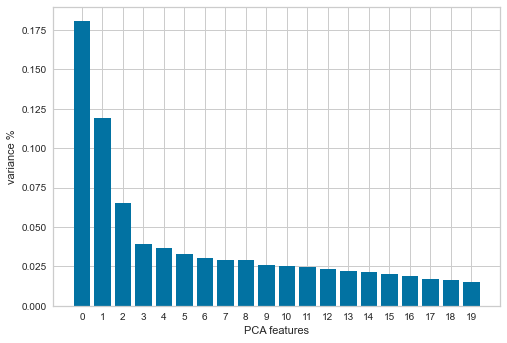

In [329]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Standardize 
std_df = StandardScaler().fit_transform(trans_df)
#PCA
pca = PCA(n_components=20)
pca_df = pca.fit_transform(std_df)
# plot the diagram
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
PCA_components = pd.DataFrame(pca_df)

In [340]:
PCA_components.iloc[:,:3]

,0,1,2
0,-5.475058,4.084364,7.299333
1,-13.344082,10.678187,12.492997
2,-15.944407,15.539123,23.721691
3,-17.147392,19.027977,23.859304
4,-16.658161,19.693293,27.731077
5,-10.515089,4.638782,3.494370
6,-8.552206,0.168347,-0.690451
7,-7.672678,-6.817589,-10.604744
8,-8.662381,0.579223,-1.311582
9,-8.341252,-3.856266,-2.090802


Fig. 1 shows that the first three components explain the majority of the variance in our data. 

fig2 = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), sil,'-o')
plt.xlabel("Number of Cluster")
plt.ylabel("silhouette score")
plt.grid(True)
plt.title('Silhouette Method')

Text(0.5, 1.0, 'Elbow curve')

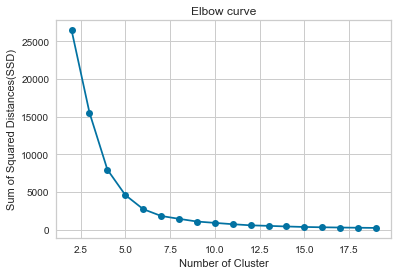

In [336]:
#K-means
from tslearn.clustering import TimeSeriesKMeans
from sklearn.metrics import silhouette_score
#sil = []
#sil.append(silhouette_score(X, labels, metric = 'euclidean'))

X = PCA_components.iloc[:,:3]
ssd = []

for k in range(2, 20):
    k_means = KMeans(n_clusters=k)
    k_means=k_means.fit(X)
    labels = k_means.labels_    
    ssd.append(k_means.inertia_)
    
    
fig = plt.figure(figsize=(6, 4))
plt.plot(range(2, 20), ssd,'-o')
plt.xlabel("Number of Cluster")
plt.ylabel("Sum of Squared Distances(SSD)")
plt.grid(True)
plt.title('Elbow curve')

    

Fig. 3 shows that after 6 clusters at (the elbow) the change in the value of inertia is no longer significant and most likely, neither is the variance of the rest of the data after the elbow point. Therefore we can discard everything after k=4 and proceed to the last step in the process.


In [341]:
kmeans=KMeans(n_clusters = 6).fit(PCA_components.iloc[:,:3])
print("The sum of squared distances (SSD) is",kmeans.inertia_)
Industry = pd.DataFrame(trans_df.index,columns=['Industry'])
cluster_labels = pd.DataFrame(kmeans.labels_,columns=['label'])
df = pd.concat([Industry, cluster_labels],axis = 1)
df.sort_values("label")

The sum of squared distances (SSD) is 2718.955189748014


,Industry,label
0,Agric,0
25,Guns,0
31,Telcm,0
32,PerSv,0
33,BusSv,0
34,Comps,0
35,Chips,0
36,LabEq,0
46,Fin,0
37,Paper,0


In this study, I used two clustering methods. The first one is K-Means, and the other is Hierarchical Clustering. 

As the Eblow Curve shows a smooth pattern(does not go flat), it's not clear that what value of k is optimal for K-Means clustering method. Therefore, I calculate the Silhouette score for K-Means clusters to find the maximum of silhouette score. In this case, the maximum of the silhouette score appears at when the number of cluster k is 3. Thus, I would like to use K-Means with 3 cluster to group the data. 

In [295]:
kmeans=KMeans(n_clusters = 3).fit(X)
print("The sum of squared distances (SSD) is",kmeans.inertia_)
Industry = pd.DataFrame(trans_df.index,columns=['Industry'])
cluster_labels = pd.DataFrame(kmeans.labels_,columns=['label'])
df = pd.concat([Industry, cluster_labels],axis = 1)
df.sort_values("label")

The sum of squared distances (SSD) is 95803.59759809522


,Industry,label
27,Mines,0
28,Coal,0
19,FabPr,0
18,Steel,0
29,Oil,0
0,Agric,1
30,Util,1
31,Telcm,1
32,PerSv,1
33,BusSv,1


After applying the KMean(3)model,'Mines', 'Coal', 'Oil',and "Gold" are clustered together with index 0; 'Agric', 'Food', 'Soda', 'Beer', 'Smoke', 'Toys', 'Fun', 'Books','Hshld', 'Clths', 'Hlth', 'MedEq', 'Chems', 'Rubbr', 'Txtls','BldMt', 'Cnstr', 'Steel', 'FabPr', 'Mach', 'ElcEq', 'Autos', 'Aero','Ships', 'Guns','Mines', 'Coal', 'Oil', 'Util', 'PerSv',  'Paper', 'Boxes', 'Trans','Whlsl', 'Rtail', 'Meals', 'Banks', 'Insur', 'RlEst', 'Fin', and 'Other' are together under the index 1; 'BusSv', 'Comps','Telcm','Drugs',"LabEq", and "Chips" are under index 2. 

Next, I will try a different method called "Hierarchical Clustering" to cluster the dataset.

In [337]:
from scipy.cluster.hierarchy import linkage, dendrogram
Z = linkage(PCA_components.iloc[:,:3], method='average', metric='euclidean')

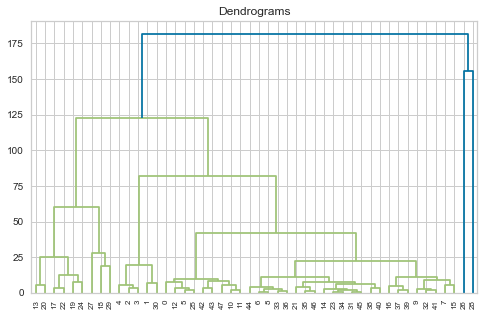

In [345]:
from scipy.cluster.hierarchy import linkage, dendrogram
plt.figure(figsize=(8, 5))  
plt.title("Dendrograms")  
dend = dendrogram(linkage(PCA_components.iloc[:,:3], method='ward'))

The x-axis consists of the 48 industries and y-axis consists of the Euclidean distance between the clusters.

In [312]:
from scipy.cluster.hierarchy import fcluster

# distance cutoff
distance_threshold = 4000
y = fcluster(Z, distance_threshold, criterion='distance')

# max no. of clusters
max_clusters = 3
y = fcluster(Z, max_clusters, criterion='maxclust')

In [313]:
Industry = pd.DataFrame(trans_df.index,columns=['Industry'])
y_df=pd.DataFrame(y,columns=['label'])
df = pd.concat([Industry, y_df],axis = 1)
df.sort_values("label")

,Industry,label
0,Agric,1
25,Guns,1
27,Mines,1
29,Oil,1
30,Util,1
31,Telcm,1
32,PerSv,1
33,BusSv,1
34,Comps,1
35,Chips,1


By the hierarchical clustering, as the dendrogram shows above, the cluster with index 1 has 46 industries:  'Agric', 'Food', 'Soda', 'Beer', 'Smoke', 'Toys', 'Fun', 'Books','Hshld', 'Clths', 'Hlth', 'MedEq', 'Drugs', 'Chems', 'Rubbr', 'Txtls','BldMt', 'Cnstr', 'Steel', 'FabPr', 'Mach', 'ElcEq', 'Autos', 'Aero','Ships', 'Guns','Mines',  'Oil', 'Util', 'Telcm', 'PerSv', 'BusSv', 'Comps', 'Chips', 'LabEq', 'Paper', 'Boxes', 'Trans','Whlsl', 'Rtail', 'Meals', 'Banks', 'Insur', 'RlEst', 'Fin', and 'Other'. Meanwhile, the cluster with index 2 only has "Coal" in it and the cluster with index 3 only has "Gold".

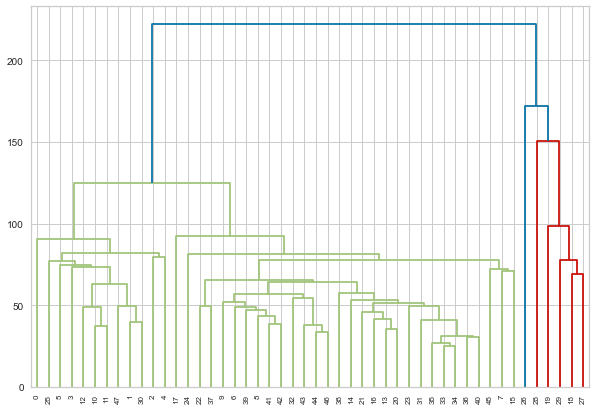

In [346]:
#Method 2 to plot the dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
X=np.asarray(trans_df)

linked = linkage(X, method="ward")

labelList = range(1, 11)

plt.figure(figsize=(10, 7))
dendrogram(linked,show_leaf_counts=True)
plt.show()

The x-axis consists of the 48 industries and y-axis consists of the Euclidean distance between the clusters. 